# Clustering

## Dimensionality Reduction & LSA

In [28]:
import numpy as np
import scipy as sp
import pandas as pd
import json as js
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
%matplotlib inline

In [2]:
# Read report
data = pd.read_csv("02-ASRS_DBOnline.csv",index_col=0).reset_index()
data = data.dropna(subset=['Place.3','Place.5','Report 1.2']).reset_index()[1:]
new_report = pd.read_csv("02-report.csv", index_col=0)
new_report.head()

,Summary
0,synopsi narr
1,helicopt encount sma acft IN see avoid situat ...
2,close prox ga-sma ga-smt ON v106 . level AT 45...
3,close prox 2 ga-sma acft IN traffic pattern AT...
4,close prox GA sma parachutist IN restrict area...


In [3]:
new_report.head()

,Summary
0,synopsi narr
1,helicopt encount sma acft IN see avoid situat ...
2,close prox ga-sma ga-smt ON v106 . level AT 45...
3,close prox 2 ga-sma acft IN traffic pattern AT...
4,close prox GA sma parachutist IN restrict area...


In [4]:
# Word reference
word_reference = pd.read_csv("02-ASRS-word-reference.csv", index_col=0)
def lookup(word):
    for i in range(len(word_reference)):
        if word_reference['after'][i] == word:
            print(word_reference['before'][i])
            break

In [5]:
lookup('ra')

RAs


In [6]:
# Tfid Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(new_report['Summary'])
print(dtm.shape)
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
terms = vectorizer.get_feature_names()

(728, 1779)


In [7]:
# Decide n_components
svd = TruncatedSVD(n_components=100, algorithm="randomized")
svd_fit = svd.fit_transform(centered_dtm)
svd_norm = Normalizer().fit_transform(svd_fit)

vt = svd.components_
dfnorm = pd.DataFrame(svd_norm)

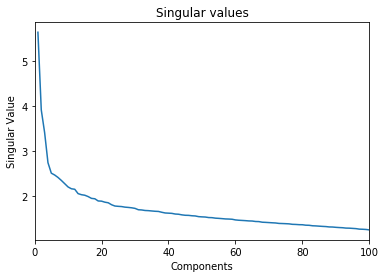

In [8]:
s = svd.singular_values_
plt.xlim([0,100])
plt.plot(range(1,len(s)+1),s)
plt.title('Singular values')
plt.ylabel('Singular Value')
plt.xlabel('Components')

In [9]:
# Tfid Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(new_report['Summary'])
print(dtm.shape)
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
terms = vectorizer.get_feature_names()

(728, 1779)


In [10]:
svd = TruncatedSVD(n_components=10, algorithm="randomized")
svd_fit = svd.fit_transform(centered_dtm)
svd_norm = Normalizer().fit_transform(svd_fit)

vt = svd.components_
dfnorm = pd.DataFrame(svd_norm)

In [11]:
order_components = vt.argsort()[:, ::-1]
components = []
for i in range(vt.shape[0]):
    label = [terms[ind] for ind in order_components[i, :10]]
    components.append(label)
dfnorm.columns = components
dfnorm.head()

,accid,failur,flight,board,determin,probabl,caus,safeti,nation,transport
,tcasii,ft,ra,clb,atc,tfc,visual,accid,dscnt,ta
,acr,sector,issu,radar,ctlr,separ,error,hold,sep,hdg
,acr,rwi,twr,tcasii,turn,downwind,apch,final,ra,deg
,aircraft,sma,traffic,smt,tower,runway,approach,tfc,clock,atc
,aircraft,pattern,downwind,approach,tower,runway,traffic,visual,base,final
,sma,ra,tcasii,rptr,pattern,acr,final,radar,base,downwind
,apch,approach,aircraft,ctl,il,runway,pvd,ra,vector,tower
,acft,turn,tcasii,deg,hdg,ra,approach,crew,right,smt
,sma,acft,ft,hdg,deg,dep,hold,approach,aircraft,acr
0,0.693136,-0.268811,0.190576,-0.320664,0.209032,0.174408,0.231735,0.092021,-0.362067,-0.201952


In [12]:
print(components)

[['accid', 'failur', 'flight', 'board', 'determin', 'probabl', 'caus', 'safeti', 'nation', 'transport'], ['tcasii', 'ft', 'ra', 'clb', 'atc', 'tfc', 'visual', 'accid', 'dscnt', 'ta'], ['acr', 'sector', 'issu', 'radar', 'ctlr', 'separ', 'error', 'hold', 'sep', 'hdg'], ['acr', 'rwi', 'twr', 'tcasii', 'turn', 'downwind', 'apch', 'final', 'ra', 'deg'], ['aircraft', 'sma', 'traffic', 'smt', 'tower', 'runway', 'approach', 'tfc', 'clock', 'atc'], ['aircraft', 'pattern', 'downwind', 'approach', 'tower', 'runway', 'traffic', 'visual', 'base', 'final'], ['sma', 'ra', 'tcasii', 'rptr', 'pattern', 'acr', 'final', 'radar', 'base', 'downwind'], ['apch', 'approach', 'aircraft', 'ctl', 'il', 'runway', 'pvd', 'ra', 'vector', 'tower'], ['acft', 'turn', 'tcasii', 'deg', 'hdg', 'ra', 'approach', 'crew', 'right', 'smt'], ['sma', 'acft', 'ft', 'hdg', 'deg', 'dep', 'hold', 'approach', 'aircraft', 'acr']]


In [13]:
dfloc = pd.DataFrame(scale(data[['Place.3', 'Place.5']]), columns=['dis', 'alt'])
df_features = dfloc.join(dfnorm)
df_features['dis'] = df_features['dis'].apply(lambda x: x * 1)
df_features['alt'] = df_features['alt'].apply(lambda x: x * 1)
df_features.to_csv('03-lsa.csv')
df_features.head()

/Users/aslstem/anaconda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 10 on the right)
  warnings.warn(msg, UserWarning)


,dis,alt,"(accid, tcasii, acr, acr, aircraft, aircraft, sma, apch, acft, sma)","(failur, ft, sector, rwi, sma, pattern, ra, approach, turn, acft)","(flight, ra, issu, twr, traffic, downwind, tcasii, aircraft, tcasii, ft)","(board, clb, radar, tcasii, smt, approach, rptr, ctl, deg, hdg)","(determin, atc, ctlr, turn, tower, tower, pattern, il, hdg, deg)","(probabl, tfc, separ, downwind, runway, runway, acr, runway, ra, dep)","(caus, visual, error, apch, approach, traffic, final, pvd, approach, hold)","(safeti, accid, hold, final, tfc, visual, radar, ra, crew, approach)","(nation, dscnt, sep, ra, clock, base, base, vector, right, aircraft)","(transport, ta, hdg, deg, atc, final, downwind, tower, smt, acr)"
0,-0.214551,-0.640337,0.693136,-0.268811,0.190576,-0.320664,0.209032,0.174408,0.231735,0.092021,-0.362067,-0.201952
1,0.237947,-0.373952,-0.071043,-0.420911,-0.083675,-0.131876,0.365261,-0.391918,0.529286,-0.123806,0.058281,0.455533
2,-0.458203,-0.866764,-0.188154,-0.427939,0.077844,-0.042387,0.538236,-0.619097,-0.094684,-0.040557,0.262794,-0.144773
3,-0.005706,-0.507144,-0.151764,-0.674942,-0.301965,0.032858,-0.088956,0.016190,0.522065,-0.075594,0.224719,0.303675
4,-0.458203,-0.733571,0.206753,-0.494554,-0.066773,-0.351084,0.476252,-0.033602,0.336687,-0.144416,-0.470775,0.034091


Full forms of the above abbreviations:
1. 
2. 
3. 
4.
5.
1. aircaft, error, standard, system, separation, between, Less Than Standard Separation
2. control, boston air route traffic control center, experience, operator, at, separation, standard, feet
3. Traffic Alert and Collision Avoidance, to, alert, aircaft, Resolution Advisory, Less Than Standard Separation, assign, descdent
4. runways, on, aircraft, approach, experience, Less Than Standard Separation, operator, error
5. Resolution Advisory, Traffic Alert and Collision Avoidance, report, crew, aircraft, approach runway, control

1. Near mid air collision, , , Pattern
2. aircraft, error, standard, Near mid air collision,
3. separate, 
4.
5.

Explain deciding n_components; number of clusters...

## Analysis

1. midair collision sma has pattern / less than standard separation system error oppuacied
2. aircarrier error standard midair collision / in separate standard aircraft
3. nmac operator 

## K-means

In [17]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1)
kmeans.fit_predict(df_features)
Kcentroids = kmeans.cluster_centers_
Klabels = kmeans.labels_
print(Klabels.shape)

(571,)


In [18]:
# Name k clusters
Kasc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
Korder_centroids = Kasc_order_centroids[:,::-1]
Korder_centroids = np.array([[x - 2 for x in row if (x - 2) >= 0] for row in Korder_centroids]) # remove locations

Kcluster_names = []
for i in range(k):
    label = [components[ind] for ind in Korder_centroids[i, :2]]
    Kcluster_names.append(label)

In [21]:
def find_report(cluster_num):
    report = [data.iloc[i]['Report 1.2'] for i in range(len(Klabels)) if Klabels[i] == cluster_num]
    return report

# Sample Report
find_report(4)

['HELICOPTER ENCOUNTERED SMA ACFT IN SEE AND AVOID SITUATION. TOOK EVASIVE ACTION.',
 'CLOSE PROX GA-SMA GA-SMT ON V106.',
 'CLOSE PROX 2 GA-SMA ACFT IN TRAFFIC PATTERN AT PLM.',
 'CLOSE PROX GA SMA AND PARACHUTIST IN RESTRICTED AREA THAT WAS ADVERTISED NOT ACTIVE.',
 'LESS THAN STANDARD SEPARATON AND NMAC BETWEEN COMMUTER AND SMA ACFT. OPERATIONAL ERROR.',
 'SMA CONDUCTING ACROBATIC TRAINING HAS NMAC WITH SMT.',
 'NMAC BETWEEN ACR MLG AND GLIDER.',
 'LGT AND SMT HAVE NEAR MIDAIR COLLISION.',
 'CLOSE PROX ACR MLG AND UNK ON ILS APCH TO BDL.',
 'ACR-MLG BEING VECTORED FOR VISUAL APCH WAS DESCENDED BELOW MVA AND INTO CONFLICT WITH ACR-LGT ON ILS APCH.',
 'LTT AND SMA HAVE NMAC.',
 'MLG HAS NMAC WITH ANOTHER ACFT; AN SMT OR LARGER; OUTSIDE THE BOS TCA.',
 'NMAC AT UNCONTROLLED ARPT INVOLVING ILS APCHS AND OPPOSITE DIRECTION RWY IN USE.',
 'NMAC.',
 'WDB GIVEN TRAFFIC INFORMATION ON UNKNOWN SMA TRAFFIC SAW THE ACFT PASS IN CLOSE PROX A FEW SECONDS LATER. NO EVASIVE ACTION BY EITHER ACFT.',

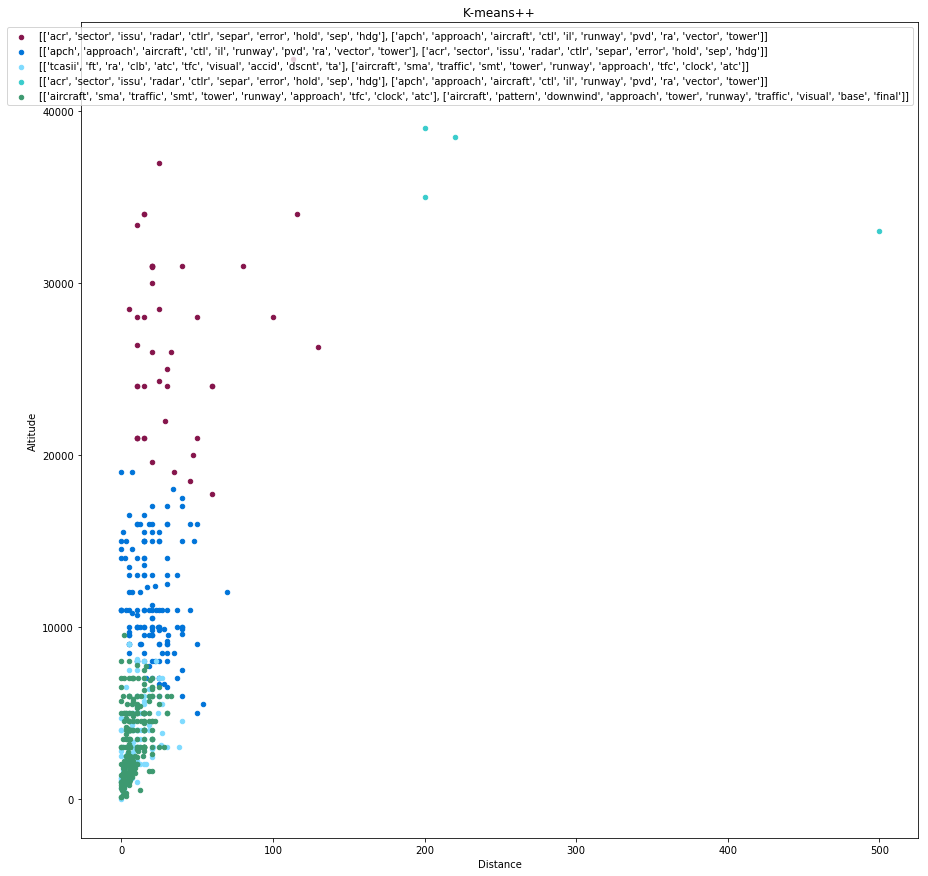

In [22]:
# Plot k-means++
plt.figure(figsize=(15, 15))
colors = ['#85144b', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00', '#FF851B', '#FF4136', '#AAAAAA', '#222222']

for cluster_index in range(k):
    alt = [data.iloc[i]['Place.5'] for i in range(len(Klabels)) if Klabels[i] == cluster_index]
    dis = [data.iloc[i]['Place.3'] for i in range(len(Klabels)) if Klabels[i] == cluster_index]
    plt.scatter(x=dis, y=alt, c=colors[cluster_index], label = Kcluster_names[cluster_index], s=20)

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.title('K-means++')
plt.show()

1. Traffic Collision Avoidence System / FT / Radar Advisory Service / Climb / Air Traffic Control / Traffic / Visual / accident / descent / true air speed
2. Traffic / Apching (What is this?) / sector (a portion of an itinerary) / Visual / Control / Bradley International Airport / Boston Air Route Traffic Control Center (ZBW) / climb / jet
3. Aircraft / sector / issue / radar / control / separation / error / holding / sep (single Engine Piston) / hdg (Heading Mode The autopilot keeps the nose of the airplane pointed at the magnetic heading bug)
4. aircraft / sma (a type of engine) / traffic / smt (SMT RDL 084 is simply a lead radial, so it is there to let you know when to start your turn) / tower / runaway / approach / clock / hdg (Heading Mode The autopilot keeps the nose of the airplane pointed at the magnetic heading bug) / atc (air traffic control)
5. Traffic / Apching (What is this?) / sector (a portion of an itinerary) / Visual / Control / Bradley International Airport / Boston Air Route Traffic Control Center (ZBW) / climb / jet

The usual flying altitude of an aircraft is 39,000 feet. 
Observation: 
1. The lower the altitude, collision is more likely to happen. 
2. At low altitude collision (< 8,000), from the text analysis we can see they happen with climbing and descent, the parameters which may affect the collision are: true air speed, control of the airplane, heading mode, radar, radar advisory service, visual, and happens frequently among sinle engine piston. 
3. At high altitude collision (8,000 ~ 3,6000), from the text analysis we can see they happen during sector(a portion of an itinerary) or climb, and associates more with the arrangement of the traffic control center and airport, visual may also counts as a factor. 

## Hierarchical

In [24]:
k = 12
euclidean = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean').fit(df_features)
Hlabels = euclidean.labels_
print(Hlabels.shape)

(571,)


In [25]:
# Find centroids for each cluster
def find_centroids(k, label):
    centroids = []
    for cluster_label in range(k):
        features_list = [df_features.values[index] for index in range(len(label)) if label[index] == cluster_label]
        sum_features = np.sum(features_list, axis=0)
        mean_features = [x/len(features_list) for x in sum_features]
        centroids.append(mean_features)
    return np.array(centroids)
Hcentroids = find_centroids(k, Hlabels)

In [26]:
# Name k Hierarchical clusters
Hasc_order_centroids = Hcentroids.argsort()#[:, ::-1]
Horder_centroids = Hasc_order_centroids[:,::-1]
Horder_centroids = np.array([[x - 2 for x in row if (x - 2) >= 0] for row in Horder_centroids]) # remove locations

Hcluster_names = []
for i in range(k):
    label = [components[ind] for ind in Horder_centroids[i, :2]]
    Hcluster_names.append(label)

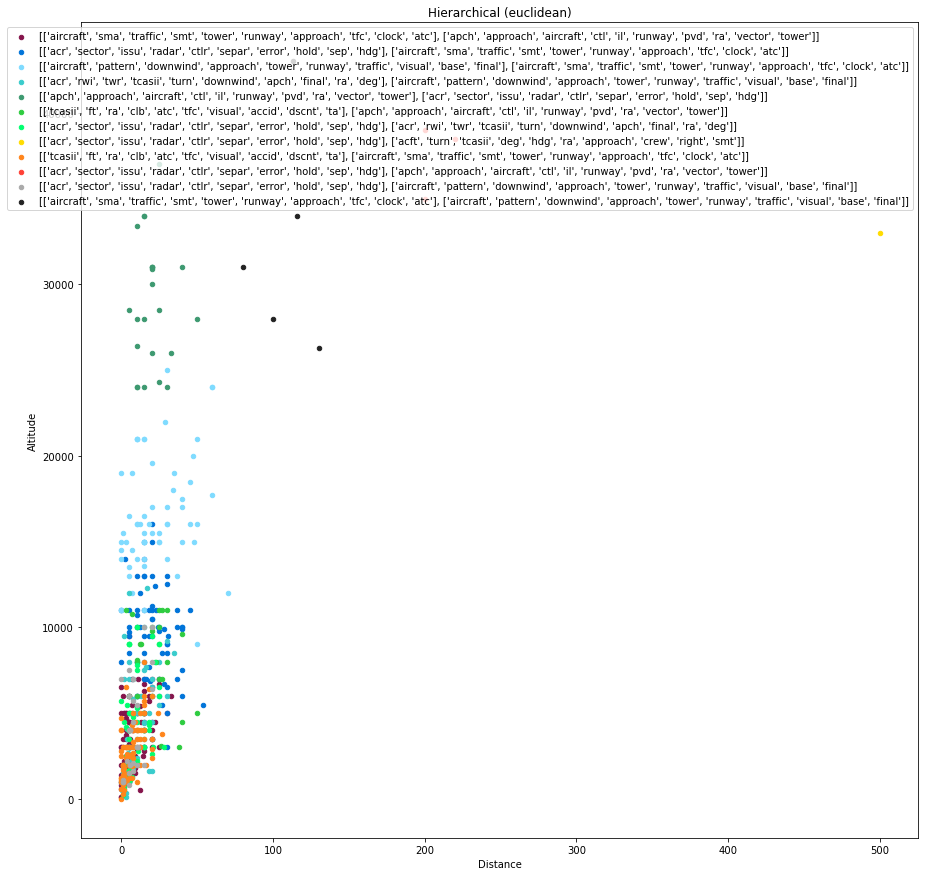

In [31]:
# Plot Hierarchical
plt.figure(figsize=(15, 15))
colors = ['#85144b', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00', '#FF851B', '#FF4136', '#AAAAAA', '#222222']

for cluster_index in range(k):
    alt = [data.iloc[i]['Place.5'] for i in range(len(Hlabels)) if Hlabels[i] == cluster_index]
    dis = [data.iloc[i]['Place.3'] for i in range(len(Hlabels)) if Hlabels[i] == cluster_index]
    plt.scatter(x=dis, y=alt, c=colors[cluster_index], label = Hcluster_names[cluster_index], s=20)

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.title('Hierarchical (euclidean)')
plt.show()

## GMM

In [32]:
gmm = mixture.GaussianMixture(n_components=k, covariance_type='spherical')
gmm.fit(df_features)
Gcentroids = gmm.means_
Glabels = gmm.predict(df_features)
print(Glabels.shape)

(571,)


In [33]:
# Name k Hierarchical clusters
Gasc_order_centroids = Gcentroids.argsort()#[:, ::-1]
Gorder_centroids = Hasc_order_centroids[:,::-1]
Gorder_centroids = np.array([[x - 2 for x in row if (x - 2) >= 0] for row in Horder_centroids]) # remove locations

Gcluster_names = []
for i in range(k):
    label = [components[ind] for ind in Gorder_centroids[i, :2]]
    Gcluster_names.append(label)

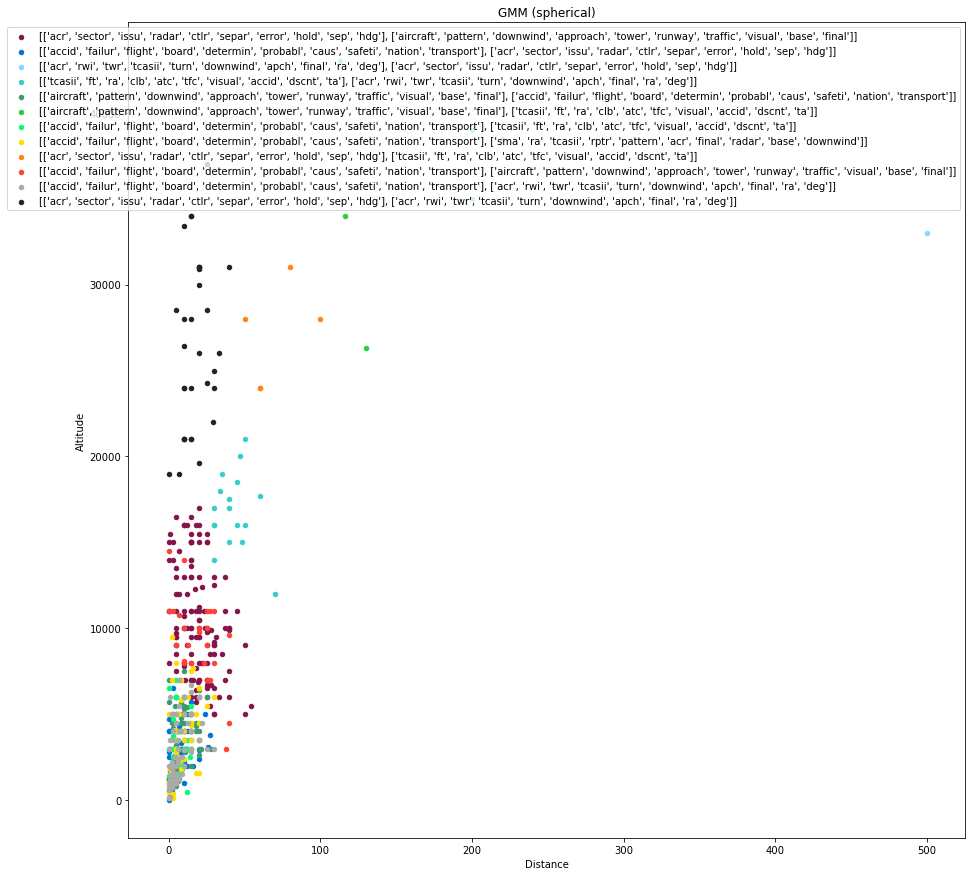

In [34]:
# Plot GMM
plt.figure(figsize=(15, 15))
colors = ['#85144b', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00', '#FF851B', '#FF4136', '#AAAAAA', '#222222']

for cluster_index in range(k):
    alt = [data.iloc[i]['Place.5'] for i in range(len(Glabels)) if Glabels[i] == cluster_index]
    dis = [data.iloc[i]['Place.3'] for i in range(len(Glabels)) if Glabels[i] == cluster_index]
    plt.scatter(x=dis, y=alt, c=colors[cluster_index], label = Gcluster_names[cluster_index], s=20)

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.title('GMM (spherical)')
plt.show()